## DATA CLEANING STEPS

In [2]:
# importing data
import pandas as pd
import numpy as np
#creating a dataframe using dict
df = pd.DataFrame(data={
    'Temperature':[25,np.nan,34,20,15,19,18,np.nan,25],
    'Humidity':[20,20,12,np.nan,13,15,np.nan,np.nan,20],
    'Situation':['Humid',np.nan, 'Too-Sunny','cool','Too Cool','Normal','Normal',np.nan,'Humid']
})
df

,Temperature,Humidity,Situation
0,25.0,20.0,Humid
1,NaN,20.0,NaN
2,34.0,12.0,Too-Sunny
3,20.0,NaN,cool
4,15.0,13.0,Too Cool
5,19.0,15.0,Normal
6,18.0,NaN,Normal
7,NaN,NaN,NaN
8,25.0,20.0,Humid


#### checking the dataframe for a missing value

In [9]:
df.isna() #True if the value is NaN (missing),False otherwise.

,Temperature,Humidity,Situation
0,False,False,False
1,True,False,True
2,False,False,False
3,False,True,False
4,False,False,False
5,False,False,False
6,False,True,False
7,True,True,True
8,False,False,False


In [17]:
df.isna().sum()  #gives total number of missing (NaN) values in each column of a DataFrame

Temperature    2
Humidity       3
Situation      2
dtype: int64

#### Visual approach to check the missing values


<Axes: >

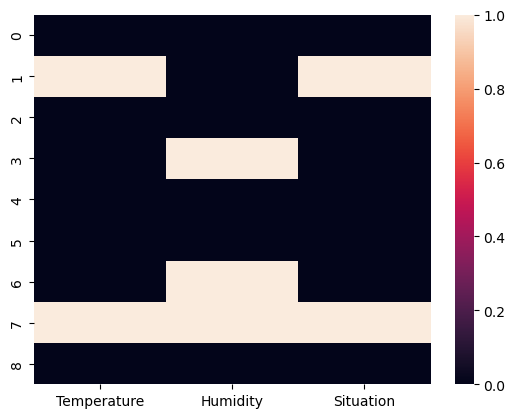

In [20]:
import seaborn as sns #uses Seaborn to create a heatmap that visually highlights missing values (NaN) 
sns.heatmap(df.isna())

#### Delete ALL records with missing values

In [52]:
tempdf=df.dropna() 
tempdf # You can see all na records deleted

,Temperature,Humidity,Situation
0,25.0,20.0,Humid
2,34.0,12.0,Too-Sunny
4,15.0,13.0,Too Cool
5,19.0,15.0,Normal
8,25.0,20.0,Humid


#### Deleting specific records 

In [54]:
#In the dataframe df, record 7 has NaN values for all columns. we can delete that record.
tempdf=df.dropna(how="all") # just give a condition saying how= delete 'all fields with nan values'.
tempdf

,Temperature,Humidity,Situation
0,25.0,20.0,Humid
1,NaN,20.0,NaN
2,34.0,12.0,Too-Sunny
3,20.0,NaN,cool
4,15.0,13.0,Too Cool
5,19.0,15.0,Normal
6,18.0,NaN,Normal
8,25.0,20.0,Humid


### Filling using Forward Mechanism

In [29]:
ffill=df.fillna(method='ffill') #Top down approach,It replaces each NaN with the value above it in the same column.
ffill  # so the first field should not be null. If so, it will replace all fields by null values

C:\Users\arulr\AppData\Local\Temp\ipykernel_75112\2704247069.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  ffill=df.fillna(method='ffill')


,Temperature,Humidity,Situation
0,25.0,20.0,Humid
1,25.0,20.0,Humid
2,34.0,12.0,Too-Sunny
3,20.0,12.0,cool
4,15.0,13.0,Too Cool
5,19.0,15.0,Normal
6,18.0,15.0,Normal
7,18.0,15.0,Normal
8,25.0,20.0,Humid


### Filling using Backward Mechanism

In [4]:
bfill = df.fillna(method = 'bfill')  # Backward fill; replaces each NaN with the next valid non-null value below it in the same. so last field should not be null
bfill

C:\Users\arulr\AppData\Local\Temp\ipykernel_75112\2706258817.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  bfill = df.fillna(method = 'bfill')


,Temperature,Humidity,Situation
0,25.0,20.0,Humid
1,34.0,20.0,Too-Sunny
2,34.0,12.0,Too-Sunny
3,20.0,13.0,cool
4,15.0,13.0,Too Cool
5,19.0,15.0,Normal
6,18.0,20.0,Normal
7,25.0,20.0,Humid
8,25.0,20.0,Humid


<Axes: >

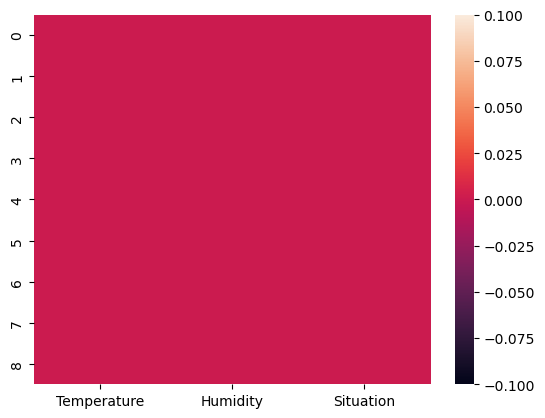

In [33]:
sns.heatmap(ffill.isnull()) # now in this heat map there wont be any nan values

### Filling using statistics - Mean

In [56]:
tempdf

,Temperature,Humidity,Situation
0,25.0,20.0,Humid
1,NaN,20.0,NaN
2,34.0,12.0,Too-Sunny
3,20.0,NaN,cool
4,15.0,13.0,Too Cool
5,19.0,15.0,Normal
6,18.0,NaN,Normal
8,25.0,20.0,Humid


In [76]:
meanv=round(tempdf["Temperature"].mean(),2)
meanv

22.29

In [78]:
tempdf["Temperature"].fillna(meanv, inplace=True) #you can't asssign this to a new varible if inplace =true, it modifies the DataFrame directly without creating a new object, meaning the operation happens in place
tempdf 

C:\Users\arulr\AppData\Local\Temp\ipykernel_75112\3435208681.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  tempdf["Temperature"].fillna(meanv, inplace=True) #you can't asssign this to a new varible if inplace =true, it modifies the DataFrame directly without creating a new object, meaning the operation happens in place
C:\Users\arulr\AppData\Local\Temp\ipykernel_75112\3435208681.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://

,Temperature,Humidity,Situation
0,25.000000,20.00,Humid
1,22.285714,20.00,NaN
2,34.000000,12.00,Too-Sunny
3,20.000000,16.67,cool
4,15.000000,13.00,Too Cool
5,19.000000,15.00,Normal
6,18.000000,16.67,Normal
8,25.000000,20.00,Humid


In [66]:
meanh=round(tempdf["Humidity"].mean(),2) #I'm rounding it since its a big decimal num
meanh

16.67

In [74]:
tempdf["Humidity"].fillna(meanh,inplace=True)
tempdf

C:\Users\arulr\AppData\Local\Temp\ipykernel_75112\1398538886.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  tempdf["Humidity"].fillna(meanh,inplace=True)
C:\Users\arulr\AppData\Local\Temp\ipykernel_75112\1398538886.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tempdf["Humidity"].fillna(meanh,inplace=True)


,Temperature,Humidity,Situation
0,25.000000,20.00,Humid
1,22.285714,20.00,NaN
2,34.000000,12.00,Too-Sunny
3,20.000000,16.67,cool
4,15.000000,13.00,Too Cool
5,19.000000,15.00,Normal
6,18.000000,16.67,Normal
8,25.000000,20.00,Humid


### Drop Duplicated Records

In [82]:
tempdf=tempdf.drop_duplicates() #it will keep the first record and delete the next duplicated record
tempdf

,Temperature,Humidity,Situation
0,25.000000,20.00,Humid
1,22.285714,20.00,NaN
2,34.000000,12.00,Too-Sunny
3,20.000000,16.67,cool
4,15.000000,13.00,Too Cool
5,19.000000,15.00,Normal
6,18.000000,16.67,Normal
